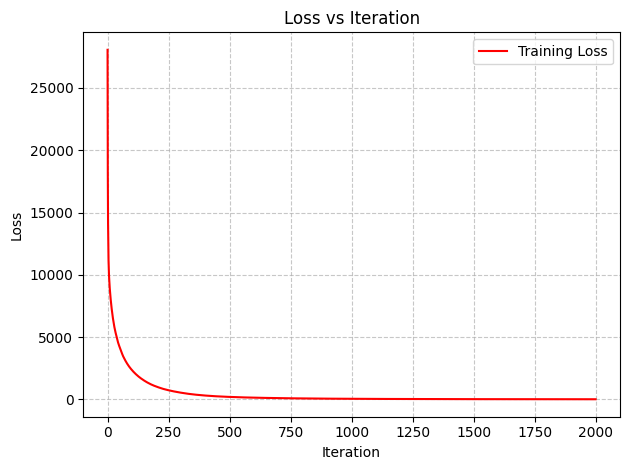

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

# Number of data samples, input feature dimensions, hidden units, and output units
num_samples, input_dim, hidden_units, output_dim = 64, 1000, 100, 10

# Randomly generating input data (features) and target labels
input_data, target_labels = randn(num_samples, input_dim), randn(num_samples, output_dim)

# Randomly initializing weights for the neural network layers
weight_input_hidden, weight_hidden_output = randn(input_dim, hidden_units), randn(hidden_units, output_dim)

loss_history = []

for i in range(2000):
    # Forward pass: Computing the hidden layer activations using the sigmoid activation function
    hidden_layer_activations = 1 / (1 + np.exp(-input_data.dot(weight_input_hidden)))

    # Forward pass: Computing the predicted output (y_pred) of the neural network
    output_predictions = hidden_layer_activations.dot(weight_hidden_output)

    # Computing the mean squared loss
    loss = np.square(output_predictions - target_labels).sum()
    loss_history.append(loss)  # Storing the current loss value in the history

    # Backward pass: Computing gradients of the loss with respect to the predicted output (y_pred)
    grad_loss_y_pred = 2.0 * (output_predictions - target_labels)

    # Backward pass: Computing gradients of the loss with respect to the weight_hidden_output
    grad_weight_hidden_output = hidden_layer_activations.T.dot(grad_loss_y_pred)

    # Backward pass: Computing gradients of the loss with respect to the hidden layer activations
    grad_hidden_activations = grad_loss_y_pred.dot(weight_hidden_output.T)

    # Backward pass: Computing gradients of the loss with respect to the weight_input_hidden
    grad_weight_input_hidden = input_data.T.dot(grad_hidden_activations * hidden_layer_activations * (1 - hidden_layer_activations))

    # Updating weights using gradient descent
    weight_input_hidden -= 1e-4 * grad_weight_input_hidden
    weight_hidden_output -= 1e-4 * grad_weight_hidden_output

# Plotting the loss values during training
plt.plot(range(2000), loss_history, label='Training Loss', color='r')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.grid(True, linestyle='--', alpha=0.7)  # Adding grid lines to the plot
plt.legend()  # Displaying the legend
plt.tight_layout()  # Ensuring all elements are visible
plt.show()
